In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ks_2samp
import pickle

In [2]:
# Carica i dati dal file
with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/branch_angles.pkl', 'rb') as file:
    data = pickle.load(file)

    branch_angles_VISp = data['VISp']
    branch_angles_VISal = data['VISal']
    branch_angles_SSp_bfd = data['SSp_bfd']

STUDIO PER L'ANGOLO MEDIO

In [20]:
def calculate_mean_branch_angles(branch_angles):
    mean_angles = [np.mean(neuron_angles) for neuron_angles in branch_angles if len(neuron_angles) > 0]
    return mean_angles

# Calcola l'angolo medio di biforcazione per ciascun neurone nelle diverse aree
mean_branch_angles_VISp = calculate_mean_branch_angles(branch_angles_VISp)
mean_branch_angles_VISal = calculate_mean_branch_angles(branch_angles_VISal)
mean_branch_angles_SSp_bfd = calculate_mean_branch_angles(branch_angles_SSp_bfd)

Statistiche descrittive per VISp: {'mean': 76.52920353641007, 'std': 5.080191995856872, 'median': 76.06511238615963}
Statistiche descrittive per VISal: {'mean': 74.13355849839516, 'std': 5.670496977894416, 'median': 73.13673174912589}
Statistiche descrittive per SSp_bfd: {'mean': 73.15887647754963, 'std': 4.5851817763690494, 'median': 72.82348713247859}


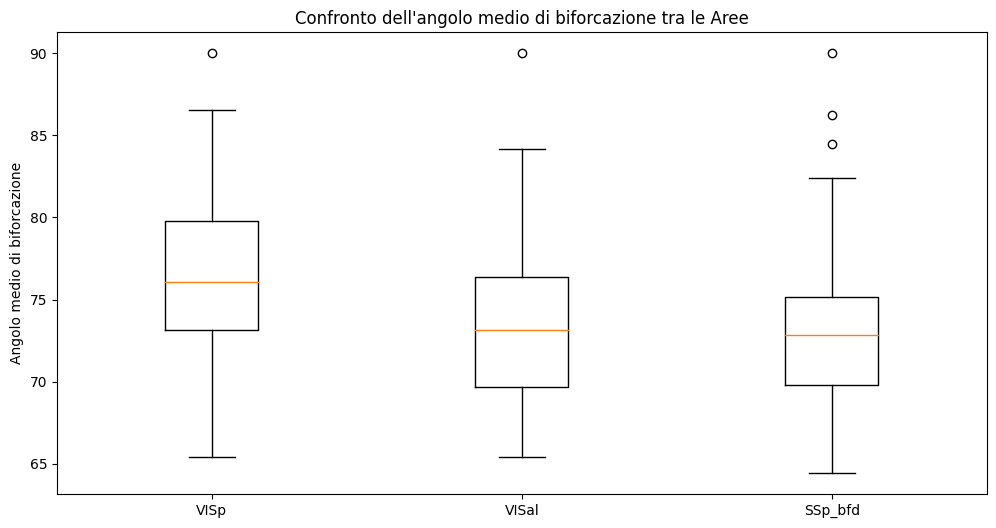

T-test VISp vs VISal: t-statistic = 2.194456316581191 , p-value = 0.030161251992022645
T-test VISp vs SSp_bfd: t-statistic = 4.872973955626766 , p-value = 2.263354261333427e-06
T-test VISal vs SSp_bfd: t-statistic = 0.9932958907418925 , p-value = 0.32227946071365254
KS-test VISp vs VISal: ks-statistic = 0.2784090909090909 , p-value = 0.04276529333390641
KS-test VISp vs SSp_bfd: ks-statistic = 0.3477272727272727 , p-value = 9.625104514978146e-06
KS-test VISal vs SSp_bfd: ks-statistic = 0.11363636363636363 , p-value = 0.8648851579679977


In [22]:
def descriptive_statistics(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'median': np.median(data)
    }

# Statistiche descrittive
desc_stats_VISp = descriptive_statistics(mean_branch_angles_VISp)
desc_stats_VISal = descriptive_statistics(mean_branch_angles_VISal)
desc_stats_SSp_bfd = descriptive_statistics(mean_branch_angles_SSp_bfd)

print("Statistiche descrittive per VISp:", desc_stats_VISp)
print("Statistiche descrittive per VISal:", desc_stats_VISal)
print("Statistiche descrittive per SSp_bfd:", desc_stats_SSp_bfd)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
plt.boxplot([mean_branch_angles_VISp, mean_branch_angles_VISal, mean_branch_angles_SSp_bfd], labels=['VISp', 'VISal', 'SSp_bfd'])
plt.ylabel('Angolo medio di biforcazione')
plt.title("Confronto dell'angolo medio di biforcazione tra le Aree")
plt.show()

# Esegui i T-test
ttest_VISp_VISal = ttest_ind(mean_branch_angles_VISp, mean_branch_angles_VISal)
ttest_VISp_SSp_bfd = ttest_ind(mean_branch_angles_VISp, mean_branch_angles_SSp_bfd)
ttest_VISal_SSp_bfd = ttest_ind(mean_branch_angles_VISal, mean_branch_angles_SSp_bfd)

print(f"T-test VISp vs VISal: t-statistic = {ttest_VISp_VISal.statistic} , p-value = {ttest_VISp_VISal.pvalue}")
print(f"T-test VISp vs SSp_bfd: t-statistic = {ttest_VISp_SSp_bfd.statistic} , p-value = {ttest_VISp_SSp_bfd.pvalue}")
print(f"T-test VISal vs SSp_bfd: t-statistic = {ttest_VISal_SSp_bfd.statistic} , p-value = {ttest_VISal_SSp_bfd.pvalue}")

# Esegui i KS-test
ks_VISp_VISal = ks_2samp(mean_branch_angles_VISp, mean_branch_angles_VISal)
ks_VISp_SSp_bfd = ks_2samp(mean_branch_angles_VISp, mean_branch_angles_SSp_bfd)
ks_VISal_SSp_bfd = ks_2samp(mean_branch_angles_VISal, mean_branch_angles_SSp_bfd)

print(f"KS-test VISp vs VISal: ks-statistic = {ks_VISp_VISal.statistic} , p-value = {ks_VISp_VISal.pvalue}")
print(f"KS-test VISp vs SSp_bfd: ks-statistic = {ks_VISp_SSp_bfd.statistic} , p-value = {ks_VISp_SSp_bfd.pvalue}")
print(f"KS-test VISal vs SSp_bfd: ks-statistic = {ks_VISal_SSp_bfd.statistic} , p-value = {ks_VISal_SSp_bfd.pvalue}")

I risultati mostrano che:

1. **T-test:**
   - Per il confronto tra VISp e VISal, il valore p (0.03) è inferiore a 0.05, indicando una differenza significativa nelle medie degli angoli di biforcazione tra queste due aree.
   - Per il confronto tra VISp e SSp_bfd, il valore p (2.26e-06) è molto inferiore a 0.05, indicando una differenza altamente significativa nelle medie degli angoli di biforcazione tra queste due aree.
   - Per il confronto tra VISal e SSp_bfd, il valore p (0.32) è superiore a 0.05, indicando che non c'è evidenza sufficiente per respingere l'ipotesi nulla di uguaglianza delle medie degli angoli di biforcazione tra queste due aree.

2. **KS-test:**
   - Per il confronto tra VISp e VISal, il valore p (0.04) è inferiore a 0.05, indicando una differenza significativa nelle distribuzioni degli angoli di biforcazione tra queste due aree.
   - Per il confronto tra VISp e SSp_bfd, il valore p (9.63e-06) è molto inferiore a 0.05, indicando una differenza altamente significativa nelle distribuzioni degli angoli di biforcazione tra queste due aree.
   - Per il confronto tra VISal e SSp_bfd, il valore p (0.86) è superiore a 0.05, indicando che non c'è evidenza sufficiente per respingere l'ipotesi nulla di uguaglianza delle distribuzioni degli angoli di biforcazione tra queste due aree.

In sintesi, ci sono differenze significative sia nelle medie che nelle distribuzioni degli angoli di biforcazione tra VISp e le altre due aree (VISal e SSp_bfd), mentre non ci sono differenze significative tra VISal e SSp_bfd.